## IMPORT LIBRARIES
Import all required libraries.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

## ABOUT DATASET
Stroke Prediction Dataset is a dataset that is used to predict whether a patient is likely to get stroke. It consists of 5110 rows and 12 columns. The last column is the target field, it indicates whether the patient will have a stroke or not. 1 indicates stroke and 0 indicates no stroke.

## LOAD THE DATASET

In [2]:
ds = pd.read_csv("stroke.csv")

## DATA FAMILIARISATION


In [3]:
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
ds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
ds.shape

(5110, 12)

In [7]:
ds.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## VISUALIZATION

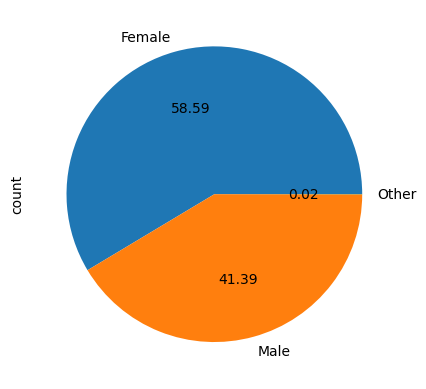

In [8]:
ds["gender"].value_counts().plot(kind = "pie",autopct = "%.2f")
plt.show()

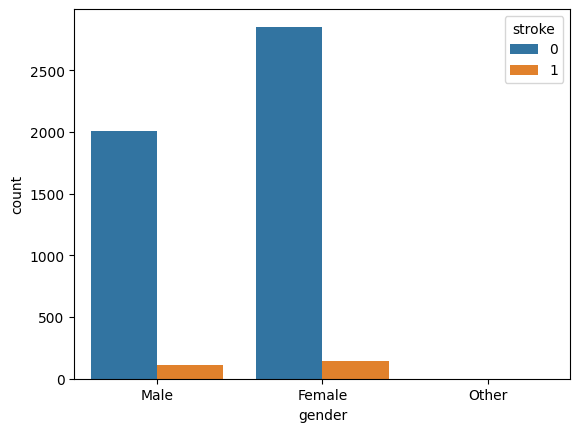

In [9]:
sns.countplot(data = ds,x = "gender",hue = "stroke")
plt.show()

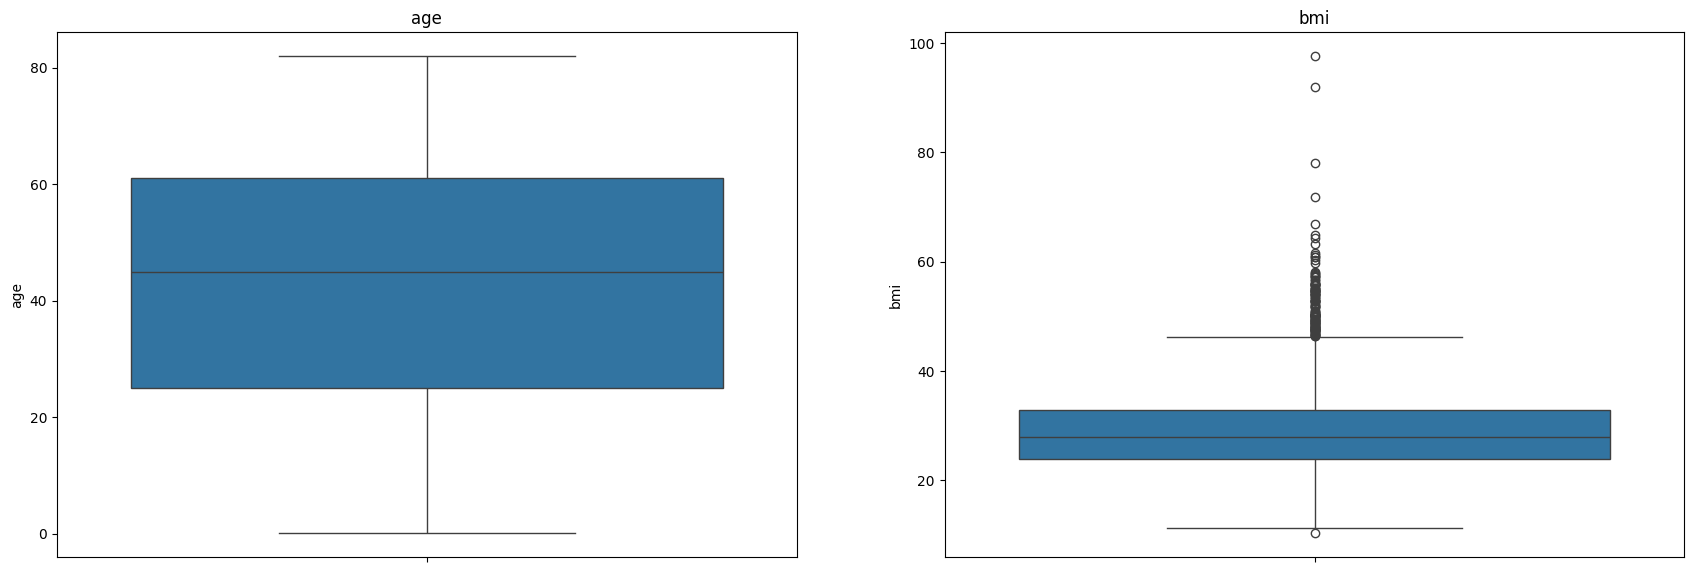

In [95]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.age)
plt.title("age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.bmi)
plt.title("bmi")

plt.show()

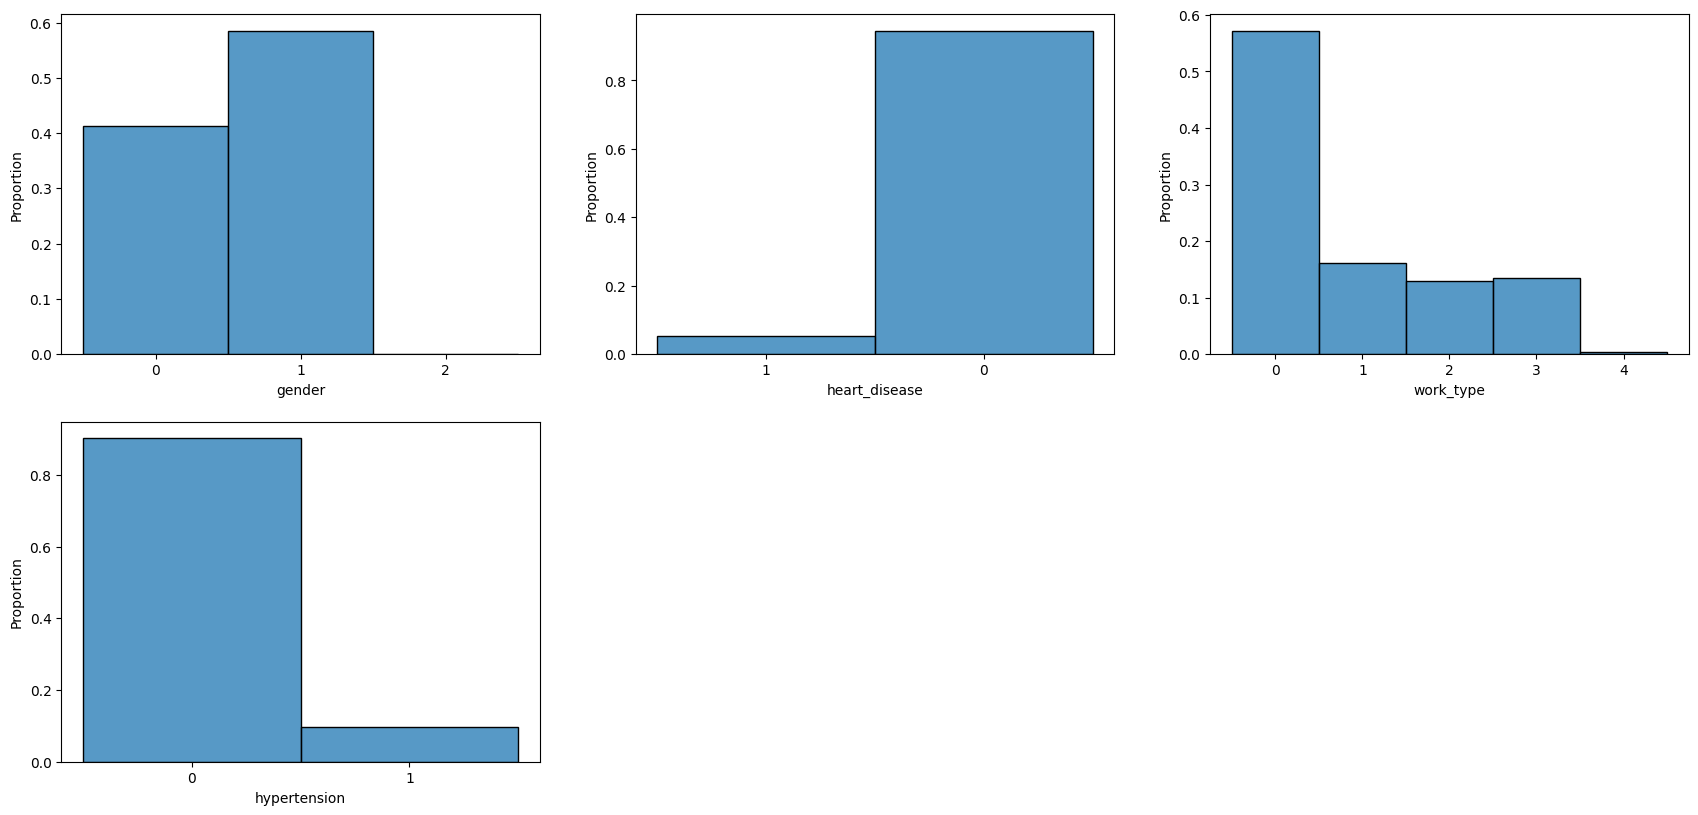

In [96]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(df.gender.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(df['heart_disease'].astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(df.work_type.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(df.hypertension.astype(str).sort_values(), stat='proportion')

plt.show()

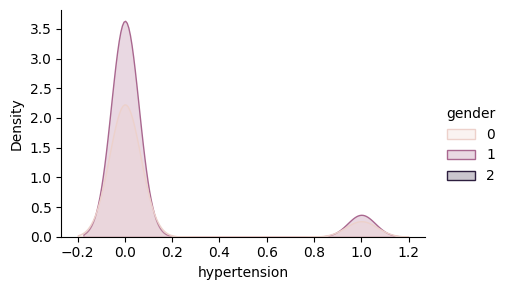

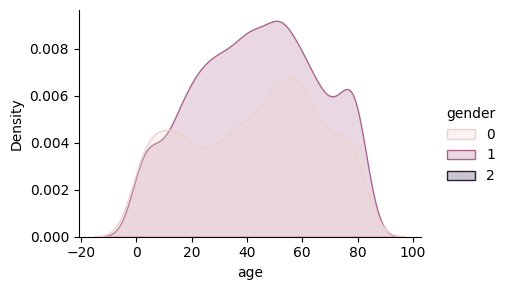

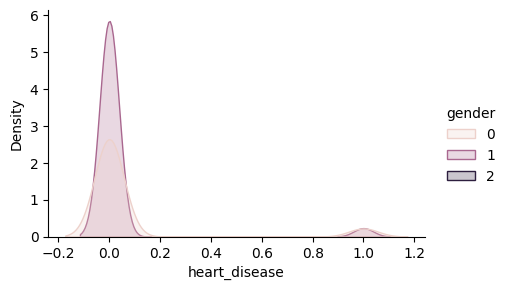

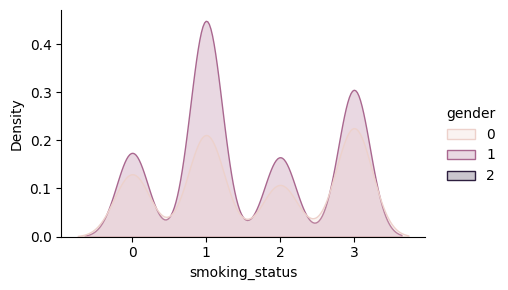

In [97]:
sns.displot(df, x=df['hypertension'], hue="gender", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['age'], hue="gender", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['heart_disease'], hue="gender", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['smoking_status'], hue="gender", kind="kde", fill=True, height=3, aspect=1.5)

plt.show()

## DATA PREPROCESSING

In [10]:
df = ds.drop(["id"],axis =1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [56]:
df["bmi"].fillna(28,inplace = True)

In [13]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
gen = {'Male':0,'Female':1,'Other':2}
df["gender"] = df["gender"].map(gen)

In [15]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
m = {'Yes':0,'No':1}
df["ever_married"] = df["ever_married"].map(m)

In [17]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [18]:
w = {'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}
df["work_type"] = df["work_type"].map(w)

In [19]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
r = {'Urban':0,'Rural':1}
df["Residence_type"] = df["Residence_type"].map(r)

In [21]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [22]:
ss = {'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3}
df["smoking_status"] = df["smoking_status"].map(ss)

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1,61.0,0,0,0,1,1,202.21,28.0,1,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1


In [24]:
df.groupby("stroke").size()

stroke
0    4861
1     249
dtype: int64

In [25]:
from sklearn.utils import resample
df_s = df[(df['stroke']==1)] 
df_ns = df[(df['stroke']==0)] 
df_s_upsampled = resample(df_s, 
                                 replace=True,    
                                 n_samples= 4861,  
                                 random_state=42)  
d1 = pd.concat([df_s_upsampled, df_ns])

In [26]:
d1.groupby("stroke").size()

stroke
0    4861
1    4861
dtype: int64

## CLASSIFICATION USING RANDOM FOREST

In [28]:
x = d1.iloc[:,0:10].values
y = d1.iloc[:,-1].values

In [29]:
x

array([[  1.  ,  74.  ,   0.  , ..., 231.61,  34.6 ,   0.  ],
       [  0.  ,  81.  ,   0.  , ..., 213.22,  26.1 ,   3.  ],
       [  1.  ,  57.  ,   0.  , ...,  68.02,  37.5 ,   1.  ],
       ...,
       [  1.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   1.  ],
       [  0.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   0.  ],
       [  1.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   3.  ]])

In [30]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 42)

In [34]:
rf =  RandomForestClassifier(random_state = 42, n_estimators = 30, criterion = "entropy")

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=42)

In [37]:
y_pred = rf.predict(x_test)

In [38]:
print("Accuracy =",accuracy_score(y_test,y_pred))

Accuracy = 0.9886870071991772


In [39]:
x1 = [[0,12,0,0,1,3,1,55,15,1]]

In [40]:
y1 = rf.predict(x1)
y1

array([0])

In [41]:
x2 = [[1,61,0,0,0,1,1,202,29,1]]

In [42]:
y2 = rf.predict(x2)
y2

array([1])

## LOGISTIC REGRESSION

In [43]:
array = df.values

In [44]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [45]:
data_rescaled = data_scaler.fit_transform(array)

In [46]:
print ("\nScaled data:\n", data_rescaled[0:10])


Scaled data:
 [[0.         0.81689453 0.         1.         0.         0.
  0.         0.80126489 0.30126002 0.         1.        ]
 [0.5        0.74365234 0.         0.         0.         0.25
  1.         0.67902317 0.20274914 0.33333333 1.        ]
 [0.         0.97558594 0.         1.         0.         0.
  1.         0.23451205 0.25429553 0.33333333 1.        ]
 [0.5        0.59716797 0.         0.         0.         0.
  0.         0.53600776 0.27605956 0.66666667 1.        ]
 [0.5        0.96337891 1.         0.         0.         0.25
  1.         0.54934909 0.15693013 0.33333333 1.        ]
 [0.         0.98779297 0.         0.         0.         0.
  0.         0.60516111 0.21420389 0.         1.        ]
 [0.         0.90234375 1.         1.         0.         0.
  1.         0.06910719 0.19587629 0.33333333 1.        ]
 [0.5        0.84130859 0.         0.         1.         0.
  0.         0.1812852  0.14318442 0.33333333 1.        ]
 [0.5        0.71923828 0.         0.

In [48]:
X = array[:,0:10]
Y = array[:,10]

GRID SEARCH PARAMETER TUNING

In [49]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)

In [50]:
model = Ridge()
grid = GridSearchCV(model, param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [51]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.06442432082794305
1.0


WITHOUT GRID SEARCH

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X,Y,test_size = 0.30, random_state = 42) 

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.9406392694063926


WITH GRID SEARCH

In [59]:
print(np.logspace(-3,3,7))

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [60]:
param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],"penalty":["l1","l2"]}

In [61]:
model = LogisticRegression()
grid_gs = GridSearchCV(model, param_grid)
grid_gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [62]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_gs.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_gs.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gs.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=0.001)

 The best score across ALL searched params:
 0.9552697581747861

 The best parameters across ALL searched params:
 {'C': 0.001, 'penalty': 'l2'}


In [63]:
model = LogisticRegression(C= 0.001, penalty= 'l2')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.9419439008480104


RANDOM SEARCH PARAMETER TUNING

In [64]:
model = LogisticRegression()
grid_rs = RandomizedSearchCV(model, param_grid)
grid_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [65]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n",grid_rs.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_rs.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rs.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=0.001)

 The best score across ALL searched params:
 0.9552697581747861

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'C': 0.001}


In [66]:
model = LogisticRegression(C= 0.001, penalty= 'l2')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.9419439008480104


## CLUSTERING

In [79]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.189511,1.051434,-0.328602,4.185032,-0.723884,-0.749127,-0.984080,2.706375,1.005543,-1.451388,4.418381
1,0.839328,0.786070,-0.328602,-0.238947,-0.723884,0.144857,1.016178,2.121559,-0.111453,-0.535985,4.418381
2,-1.189511,1.626390,-0.328602,4.185032,-0.723884,-0.749127,1.016178,-0.005028,0.473022,-0.535985,4.418381
3,0.839328,0.255342,-0.328602,-0.238947,-0.723884,-0.749127,-0.984080,1.437358,0.719800,0.379417,4.418381
4,0.839328,1.582163,3.043196,-0.238947,-0.723884,0.144857,1.016178,1.501184,-0.630986,-0.535985,4.418381


In [80]:
data=scaled[['age','stroke']]
data.head()

,age,stroke
0,1.051434,4.418381
1,0.786070,4.418381
2,1.626390,4.418381
3,0.255342,4.418381
4,1.582163,4.418381


In [81]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,10220.000000,1
1,6333.301161,2
2,1427.180479,3
3,703.561233,4
4,428.258644,5
5,373.946359,6
6,242.934865,7
7,196.206047,8
8,164.013853,9
9,109.701567,10


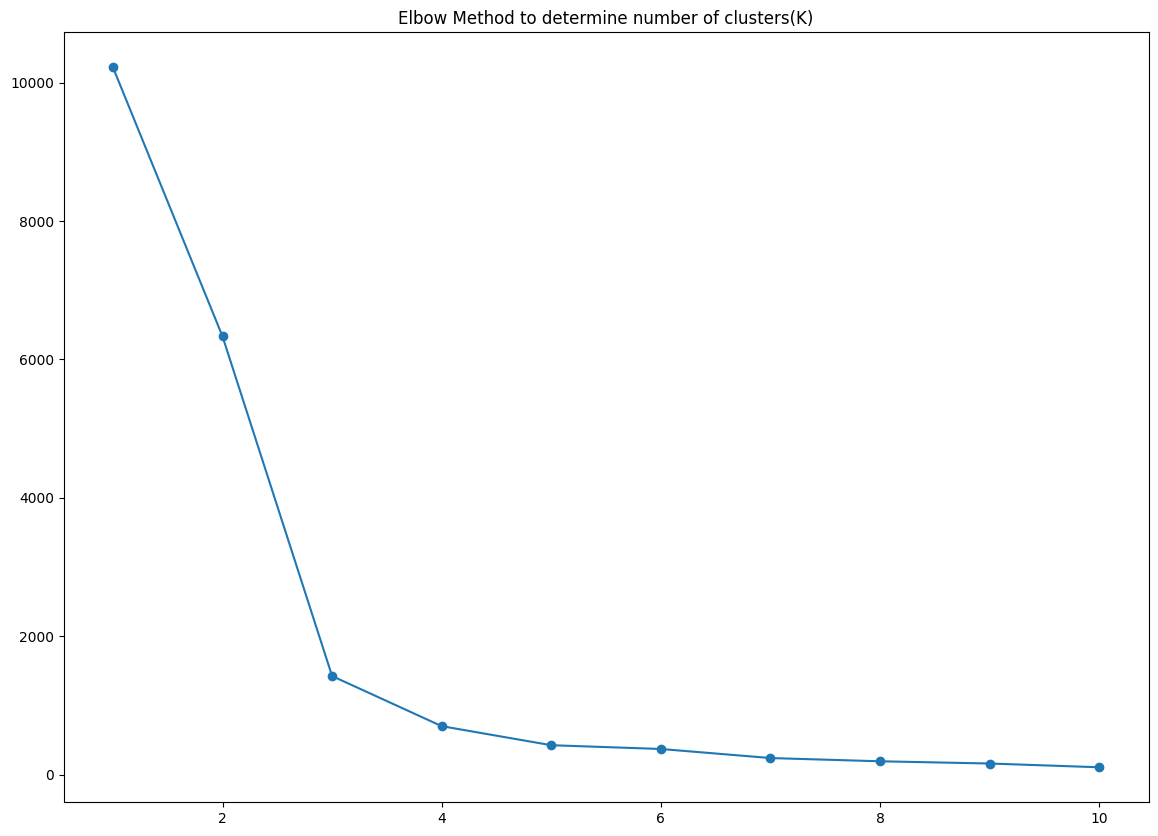

In [82]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means Clustering

In [83]:
kmeans=KMeans(n_clusters=4,random_state=0) 

In [84]:
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [85]:
prediction=kmeans.fit_predict(data)
prediction

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [86]:
clustered_data = df.copy()
clustered_data["cluster_index"] = prediction

In [87]:
clustered_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_index
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1,2
1,1,61.0,0,0,0,1,1,202.21,28.0,1,1,2
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1,2
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1,2
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,0,83.75,28.0,1,0,0
5106,1,81.0,0,0,0,1,0,125.20,40.0,1,0,0
5107,1,35.0,0,0,0,1,1,82.99,30.6,1,0,3
5108,0,51.0,0,0,0,0,1,166.29,25.6,0,0,3


<Axes: xlabel='age', ylabel='bmi'>

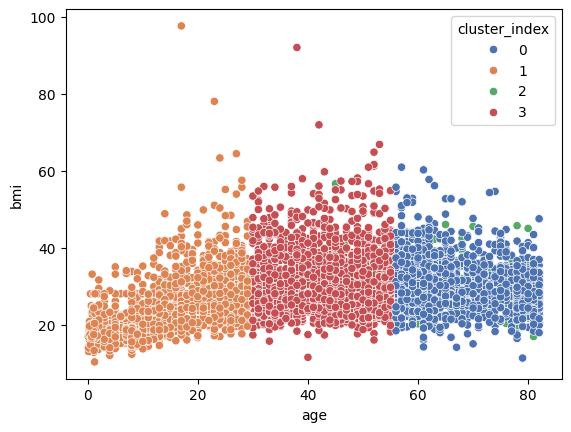

In [92]:
sns.scatterplot(x=clustered_data.age,
                y=clustered_data.bmi,
                hue=clustered_data.cluster_index,
                palette="deep")

In [93]:
clustered_data.cluster_index.unique()

array([2, 1, 0, 3], dtype=int32)

In [94]:
score = silhouette_score(df, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.097 ~ 0


DIYAA SUSAN THOMAS